In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from s3fs import S3FileSystem, S3Map

import cmocean as cm

/opt/tljh/user/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
%matplotlib notebook

In [3]:
plt.rcParams['font.size']=14
plt.rcParams['axes.labelsize']='large'
plt.rcParams['pcolor.shading']='auto'

In [4]:
# Login to the s3 bucket and list soop folders
# http://imos-data.s3-website-ap-southeast-2.amazonaws.com/?prefix=IMOS/SOOP/SOOP-SST/
fs = S3FileSystem(anon=True)
aodn = fs.ls('imos-data/IMOS/SOOP/SOOP-SST/')
for item in aodn:
    print(item)

imos-data/IMOS/SOOP/SOOP-SST/9HA2479_Pacific-Sun
imos-data/IMOS/SOOP/SOOP-SST/9V2768_RTM-Wakmatha
imos-data/IMOS/SOOP/SOOP-SST/C6FS9_Stadacona
imos-data/IMOS/SOOP/SOOP-SST/FHZI_Astrolabe
imos-data/IMOS/SOOP/SOOP-SST/HSB3402_Xutra-Bhum
imos-data/IMOS/SOOP/SOOP-SST/HSB3403_Wana-Bhum
imos-data/IMOS/SOOP/SOOP-SST/VHW5167_Sea-Flyte
imos-data/IMOS/SOOP/SOOP-SST/VHW6005_Linnaeus
imos-data/IMOS/SOOP/SOOP-SST/VJQ7467_Fantasea-Wonder
imos-data/IMOS/SOOP/SOOP-SST/VMQ9273_Solander
imos-data/IMOS/SOOP/SOOP-SST/VNAH_Portland
imos-data/IMOS/SOOP/SOOP-SST/VNCF_Cape-Ferguson
imos-data/IMOS/SOOP/SOOP-SST/VNSZ_Spirit-of-Tasmania-2
imos-data/IMOS/SOOP/SOOP-SST/VNVR_Iron-Yandi
imos-data/IMOS/SOOP/SOOP-SST/VRDE7_OOCL-Houston
imos-data/IMOS/SOOP/SOOP-SST/VRDP4_OOCL-Texas
imos-data/IMOS/SOOP/SOOP-SST/VRDU8_OOCL-Panama
imos-data/IMOS/SOOP/SOOP-SST/VROB_Highland-Chief
imos-data/IMOS/SOOP/SOOP-SST/VRZN9_Pacific-Celebes
imos-data/IMOS/SOOP/SOOP-SST/XPJ6VHP_Harbour-Master


In [5]:
def open_file_nocache(fname, myfs):
    """
    Load a netcdf file directly from an S3 bucket
    """
    fileobj = myfs.open(fname)
    return xr.open_dataset(fileobj)


In [6]:
aodn = fs.glob('imos-data/IMOS/SOOP/SOOP-SST/VMQ9273_Solander/2023/')
for item in aodn:
    print(item)



imos-data/IMOS/SOOP/SOOP-SST/VMQ9273_Solander/2023/IMOS_SOOP-SST_ST_20230104T100700Z_VMQ9273_FV01_C-20230105T163003Z.nc
imos-data/IMOS/SOOP/SOOP-SST/VMQ9273_Solander/2023/IMOS_SOOP-SST_ST_20230106T000000Z_VMQ9273_FV01_C-20230107T163004Z.nc
imos-data/IMOS/SOOP/SOOP-SST/VMQ9273_Solander/2023/IMOS_SOOP-SST_ST_20230107T000000Z_VMQ9273_FV01_C-20230108T163003Z.nc
imos-data/IMOS/SOOP/SOOP-SST/VMQ9273_Solander/2023/IMOS_SOOP-SST_ST_20230108T000000Z_VMQ9273_FV01_C-20230109T163003Z.nc
imos-data/IMOS/SOOP/SOOP-SST/VMQ9273_Solander/2023/IMOS_SOOP-SST_ST_20230109T000000Z_VMQ9273_FV01_C-20230110T163003Z.nc
imos-data/IMOS/SOOP/SOOP-SST/VMQ9273_Solander/2023/IMOS_SOOP-SST_ST_20230110T000000Z_VMQ9273_FV01_C-20230111T163004Z.nc
imos-data/IMOS/SOOP/SOOP-SST/VMQ9273_Solander/2023/IMOS_SOOP-SST_ST_20230111T000000Z_VMQ9273_FV01_C-20230112T163003Z.nc
imos-data/IMOS/SOOP/SOOP-SST/VMQ9273_Solander/2023/IMOS_SOOP-SST_ST_20230112T000000Z_VMQ9273_FV01_C-20230113T163003Z.nc
imos-data/IMOS/SOOP/SOOP-SST/VMQ9273_Sol

In [7]:
ncfile = aodn[-1]
print(ncfile)
ds = open_file_nocache(ncfile, fs)
ds

imos-data/IMOS/SOOP/SOOP-SST/VMQ9273_Solander/2023/IMOS_SOOP-SST_ST_20230521T000000Z_VMQ9273_FV01_C-20230522T163003Z.nc


<xarray.Dataset>
Dimensions:                    (TIME: 1440, h_num: 15)
Coordinates:
  * TIME                       (TIME) datetime64[ns] 2023-05-21 ... 2023-05-2...
Dimensions without coordinates: h_num
Data variables:
    LATITUDE                   (TIME) float64 ...
    LONGITUDE                  (TIME) float64 ...
    TEMP                       (TIME) float32 ...
    PSAL                       (TIME) float32 ...
    history                    (h_num) |S236 ...
    TIME_quality_control       (TIME) |S1 ...
    LATITUDE_quality_control   (TIME) |S1 ...
    LONGITUDE_quality_control  (TIME) |S1 ...
    TEMP_quality_control       (TIME) |S1 ...
    PSAL_quality_control       (TIME) |S1 ...
Attributes: (12/34)
    site:                          RV Solander
    project:                       Integrated Marine Observing System
    conventions:                   IMOS version 1.3
    title:                         Sea surface temperature and salinity data
    institution:                   Australian Bureau of Meteorology
    date_created:                  2023-05-22T16:30:03Z
    ...                            ...
    citation:                      Citation to be used in publications should...
    acknowledgement:               Data was sourced from Integrated Marine Ob...
    distribution_statement:        SOOP data may be re-used, provided that re...
    file_version:                  Level 1 - Quality Controlled Data
    file_version_quality_control:  Data in this file has been through the BOM...
    voyage_number:                 unknown

<IPython.core.display.Javascript object>


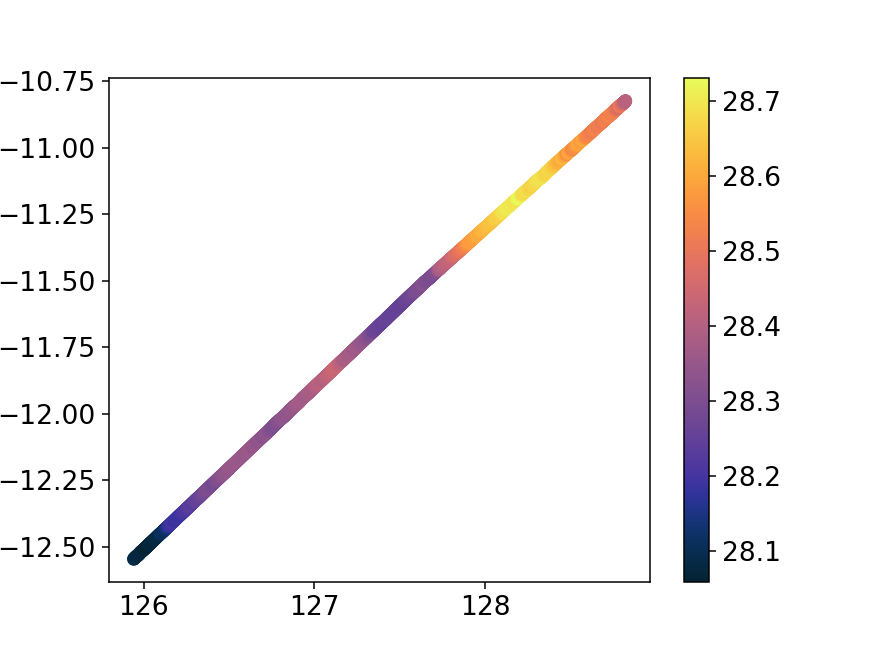

In [8]:
plt.figure()
plt.scatter(ds['LONGITUDE'],ds['LATITUDE'],c=ds['TEMP'],
           cmap=cm.cm.thermal)
plt.colorbar()

<IPython.core.display.Javascript object>


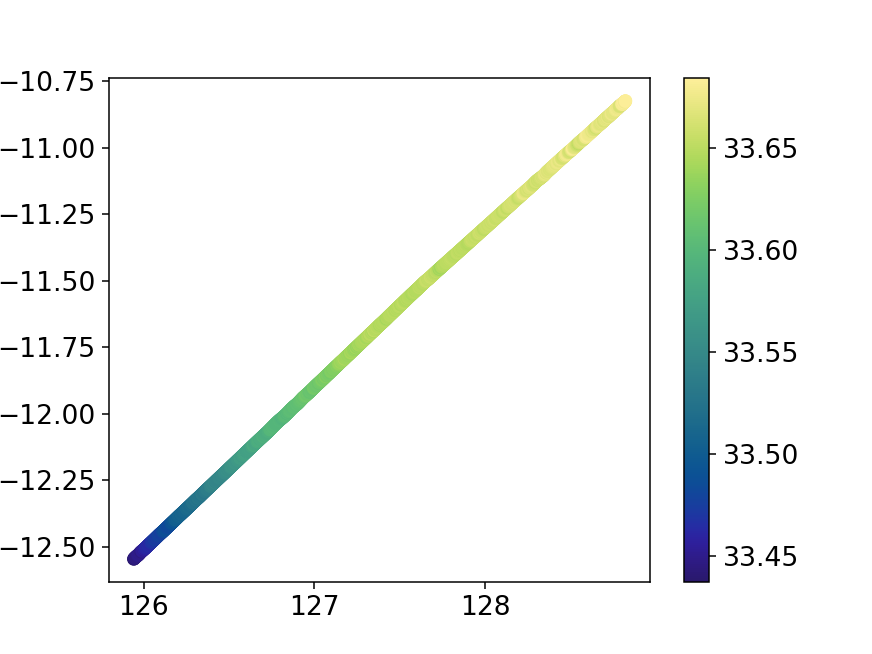

In [9]:
plt.figure()
plt.scatter(ds['LONGITUDE'],ds['LATITUDE'],c=ds['PSAL'],
           cmap=cm.cm.haline)
plt.colorbar()